In [1]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [2]:
import scipy

In [3]:
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, array_to_img
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Dropout,GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import imutils    

In [4]:
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, array_to_img
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Dropout,GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import imutils    

In [5]:
os.mkdir(r"C:\Users\deevi\Downloads\Crop-Brain-MRI")
os.mkdir(r"C:\Users\deevi\Downloads\Crop-Brain-MRI\glioma_tumor")
os.mkdir(r"C:\Users\deevi\Downloads\Crop-Brain-MRI\meningioma_tumor")
os.mkdir(r"C:\Users\deevi\Downloads\Crop-Brain-MRI\no_tumor")
os.mkdir(r"C:\Users\deevi\Downloads\Crop-Brain-MRI\pituitary_tumor")

In [6]:
os.mkdir(r"C:\Users\deevi\Downloads\Test-Brain-MRI")
os.mkdir(r"C:\Users\deevi\Downloads\Test-Brain-MRI\glioma_tumor")
os.mkdir(r"C:\Users\deevi\Downloads\Test-Brain-MRI\meningioma_tumor")
os.mkdir(r"C:\Users\deevi\Downloads\Test-Brain-MRI\no_tumor")
os.mkdir(r"C:\Users\deevi\Downloads\Test-Brain-MRI\pituitary_tumor")

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


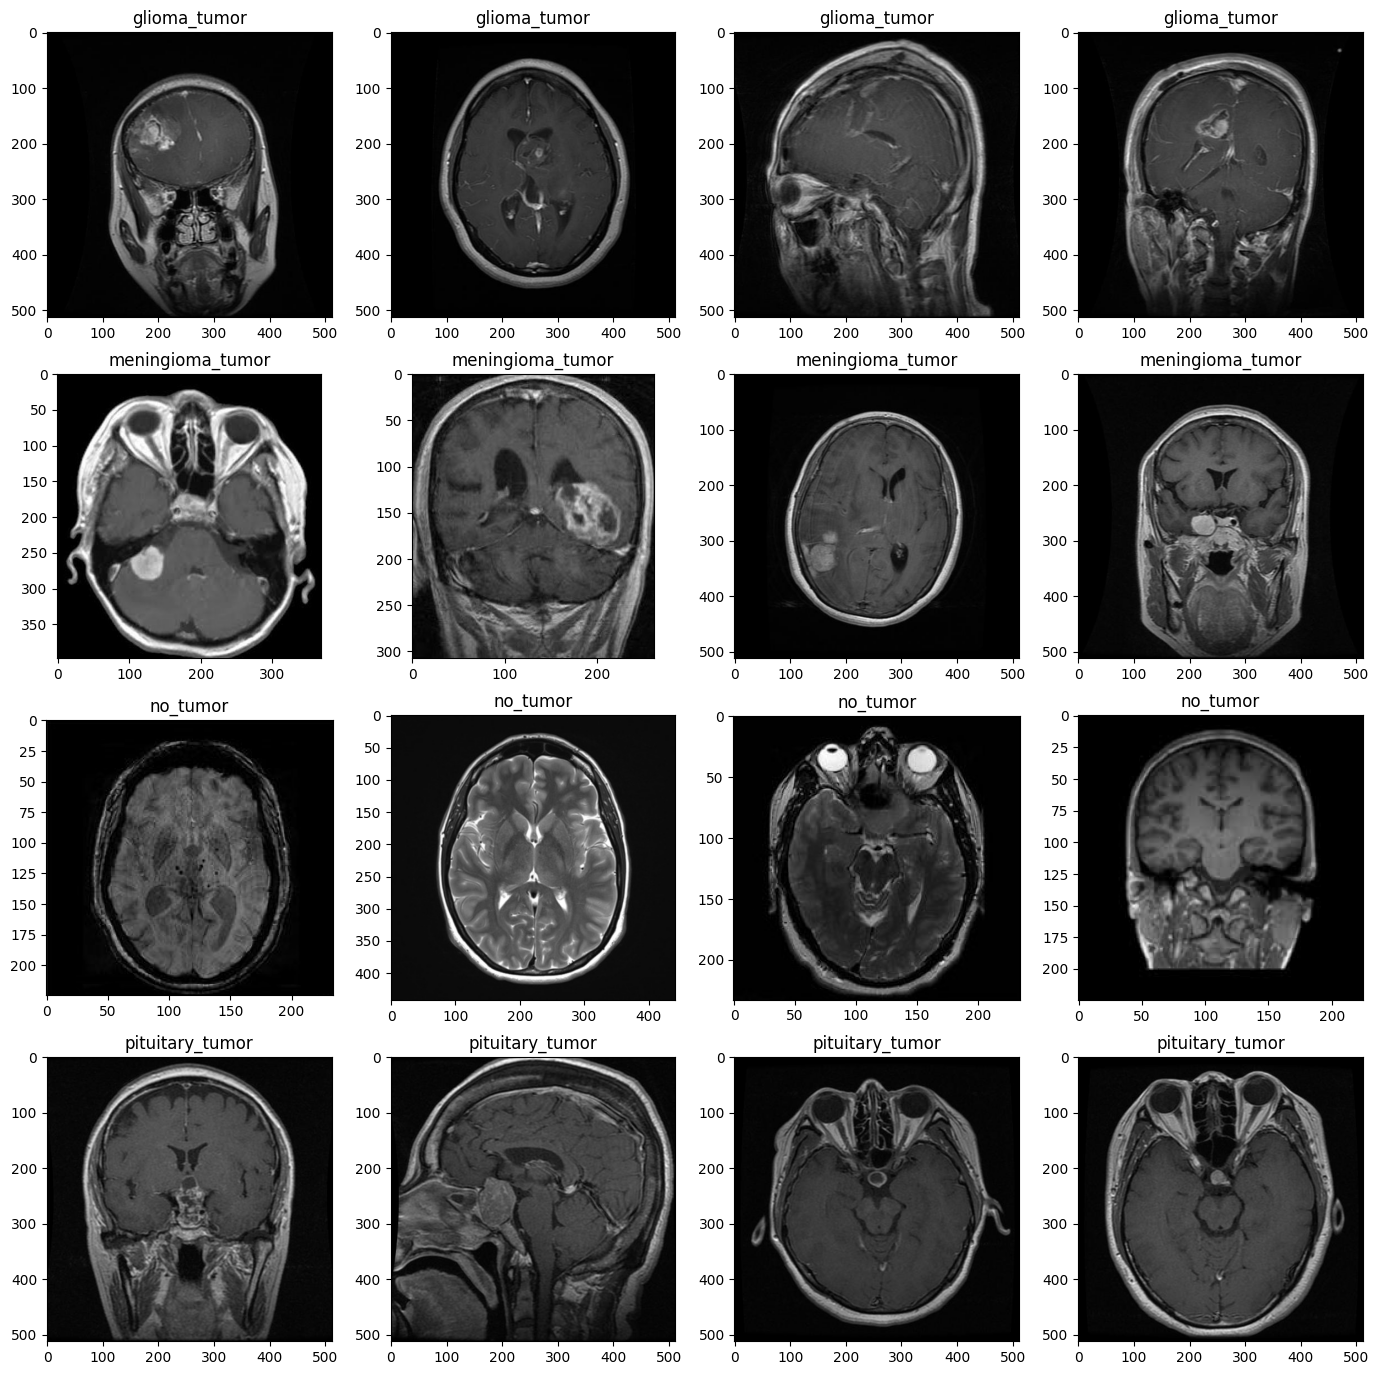

In [7]:
train_dir = r"C:\Users\deevi\Downloads\BTC\Training"
test_dir = r"C:\Users\deevi\Downloads\BTC\Testing"

classes = os.listdir(r"C:\Users\deevi\Downloads\BTC\Training")

files_path_dict = {}

for c in classes:
  files_path_dict[c] = list(map(lambda x :train_dir+'/'+c+'/'+x, os.listdir(train_dir+'/'+c)))

plt.figure(figsize=(17,17))
index = 0

for c in classes:
  random.shuffle(files_path_dict[c])
  path_list = files_path_dict[c][:5]

  for i in range (1,5):
    index += 1
    plt.subplot(4, 4, index)
    plt.imshow(load_img(path_list[i]))
    plt.title(c)

print(classes)


In [8]:
def crop_image(image, plot=False):
    
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    
    img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1]
    img_thresh = cv2.erode(img_thresh, None, iterations=2)
    img_thresh = cv2.dilate(img_thresh, None, iterations=2)

    contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    c = max(contours, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()
    
    return new_image

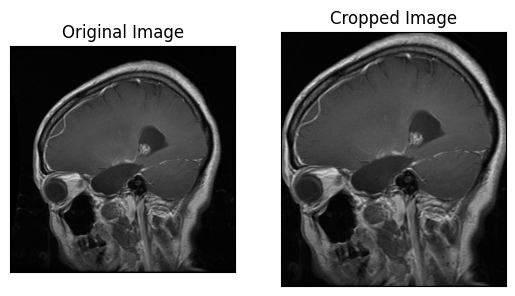

In [9]:
example_img = cv2.imread(r"C:\Users\deevi\Downloads\BTC\Training\glioma_tumor\gg (101).jpg")
cropped_image_example = crop_image(example_img, plot=True)

In [10]:
glioma = train_dir + "/glioma_tumor"
meningioma = train_dir + "/meningioma_tumor"
no_tumor = train_dir + "/no_tumor"
pituitary = train_dir + "/pituitary_tumor"

j = 0
for i in tqdm(os.listdir(glioma)):
  path = os.path.join(glioma, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224, 224))
    save_path = r"C:\Users\deevi\Downloads\Crop-Brain-MRI\glioma_tumor\ " + str(j) + ".jpg"
    cv2.imwrite(save_path, img)
    j = j+1

j = 0
for i in tqdm(os.listdir(meningioma)):
  path = os.path.join(meningioma, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224, 224))
    save_path = r"C:\Users\deevi\Downloads\Crop-Brain-MRI\meningioma_tumor\ " +str(j) +".jpg"
    cv2.imwrite(save_path, img)
    j = j+1

j = 0
for i in tqdm(os.listdir(pituitary)):
  path = os.path.join(pituitary, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224,224))
    save_path = r"C:\Users\deevi\Downloads\Crop-Brain-MRI\pituitary_tumor\ " +str(j)+".jpg"
    cv2.imwrite(save_path, img)
    j = j + 1


j = 0
for i in tqdm(os.listdir(no_tumor)):
  path = os.path.join(no_tumor, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224,224))
    save_path = r"C:\Users\deevi\Downloads\Crop-Brain-MRI\no_tumor\ " +str(j)+".jpg"
    cv2.imwrite(save_path, img)
    j = j+1

100%|██████████| 396/396 [00:01<00:00, 259.69it/s]


In [11]:
glioma = test_dir + "/glioma_tumor"
meningioma = test_dir + "/meningioma_tumor"
no_tumor = test_dir + "/no_tumor"
pituitary = test_dir + "/pituitary_tumor"

j = 0
for i in tqdm(os.listdir(glioma)):
  path = os.path.join(glioma, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224, 224))
    save_path = r"C:\Users\deevi\Downloads\Test-Brain-MRI\glioma_tumor\ " + str(j) + ".jpg"
    cv2.imwrite(save_path, img)
    j = j+1

j = 0
for i in tqdm(os.listdir(meningioma)):
  path = os.path.join(meningioma, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224, 224))
    save_path = r"C:\Users\deevi\Downloads\Test-Brain-MRI\meningioma_tumor\ " +str(j) +".jpg"
    cv2.imwrite(save_path, img)
    j = j+1

j = 0
for i in tqdm(os.listdir(no_tumor)):
  path = os.path.join(no_tumor, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224,224))
    save_path = r"C:\Users\deevi\Downloads\Test-Brain-MRI\no_tumor\ " +str(j)+".jpg"
    cv2.imwrite(save_path, img)
    j = j+1

j = 0
for i in tqdm(os.listdir(pituitary)):
  path = os.path.join(pituitary, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224,224))
    save_path = r"C:\Users\deevi\Downloads\Test-Brain-MRI\pituitary_tumor\ " +str(j)+".jpg"
    cv2.imwrite(save_path, img)
    j = j + 1


100%|██████████| 74/74 [00:00<00:00, 143.79it/s]


In [12]:
crop1=r"C:\Users\deevi\Downloads\Crop-Brain-MRI"
Test1=r"C:\Users\deevi\Downloads\Test-Brain-MRI"
datagen = ImageDataGenerator(rotation_range=10, height_shift_range=0.2, horizontal_flip=True, validation_split=0.2)
train_data = datagen.flow_from_directory(crop1, target_size=(224,224), batch_size=32, class_mode='categorical', subset='training')

valid_data = datagen.flow_from_directory(crop1, target_size=(224,224), batch_size=32, class_mode='categorical', subset='validation')

test_datagen = ImageDataGenerator()

test_data = datagen.flow_from_directory(Test1, target_size=(224,224), class_mode='categorical')

Found 2529 images belonging to 4 classes.
Found 631 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [13]:
print(train_data.class_indices)
print(test_data.class_indices)

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


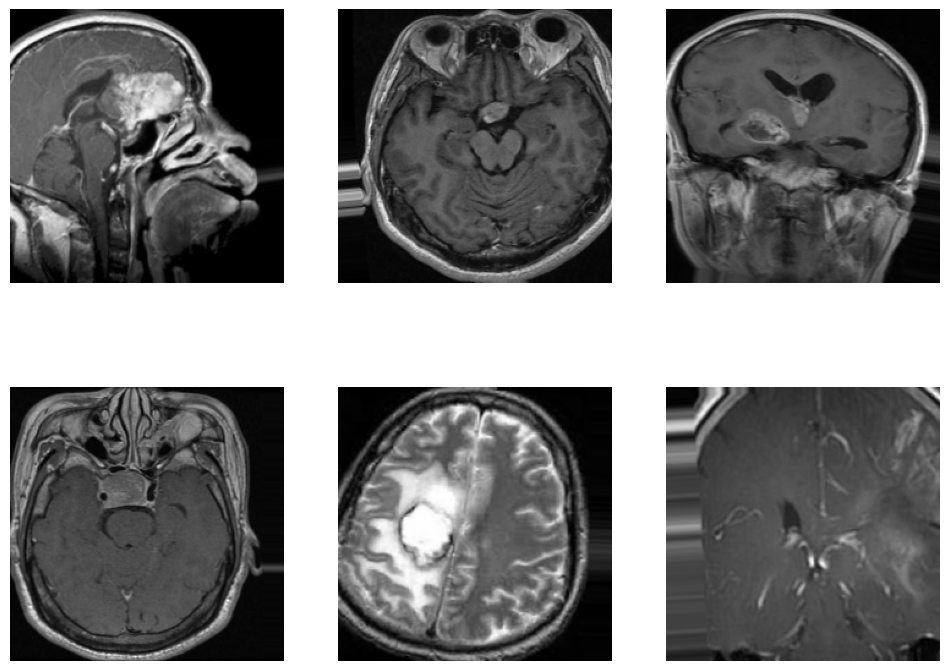

In [14]:
sample_x, sample_y =next(train_data)
plt.figure(figsize=(12,9))
for i in range (6):
  plt.subplot(2, 3, i+1)
  sample = array_to_img(sample_x[i])
  plt.axis('off')
  plt.grid(False)
  plt.imshow(sample)  
plt.show()

In [15]:
effnet = EfficientNetB1(weights="imagenet", include_top=False, input_shape=(224,224, 3))

model = effnet.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4, activation="softmax")(model)
model = Model(inputs= effnet.input, outputs=model)

model.summary()
     

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]']   

In [23]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)

earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto", verbose=1)

In [19]:
history = model.fit(train_data, epochs=7, validation_data=valid_data, verbose=1, callbacks=[checkpoint, earlystop])

Epoch 1/7
80/80 [==============================] - ETA: 0s - loss: 0.3535 - accuracy: 0.8826 
Epoch 1: val_accuracy improved from -inf to 0.78764, saving model to model.h5


C:\Users\deevi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


80/80 [==============================] - 972s 12s/step - loss: 0.3535 - accuracy: 0.8826 - val_loss: 0.5143 - val_accuracy: 0.7876
Epoch 2/7
80/80 [==============================] - ETA: 0s - loss: 0.2164 - accuracy: 0.9265 
Epoch 2: val_accuracy did not improve from 0.78764
80/80 [==============================] - 2000s 25s/step - loss: 0.2164 - accuracy: 0.9265 - val_loss: 0.5639 - val_accuracy: 0.7750
Epoch 3/7
80/80 [==============================] - ETA: 0s - loss: 0.1406 - accuracy: 0.9522 
Epoch 3: val_accuracy improved from 0.78764 to 0.85261, saving model to model.h5
80/80 [==============================] - 1228s 15s/step - loss: 0.1406 - accuracy: 0.9522 - val_loss: 0.3886 - val_accuracy: 0.8526
Epoch 4/7
80/80 [==============================] - ETA: 0s - loss: 0.1101 - accuracy: 0.9616 
Epoch 4: val_accuracy improved from 0.85261 to 0.88748, saving model to model.h5
80/80 [==============================] - 2395s 30s/step - loss: 0.1101 - accuracy: 0.9616 - val_loss: 0.3178 -

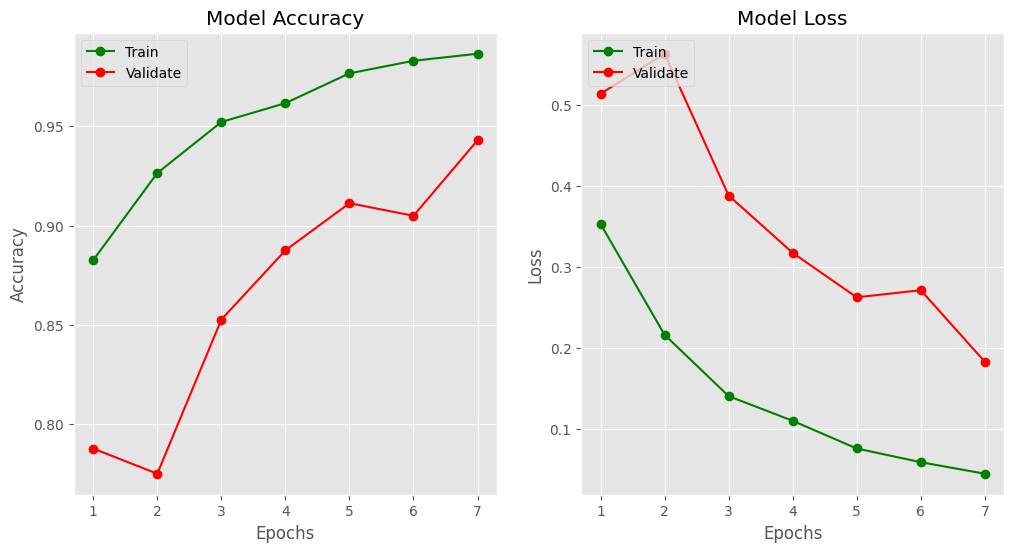

In [20]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,8)
plt.subplot(1,2,1)
plt.plot(epochs, history.history["accuracy"], "go-")
plt.plot(epochs, history.history["val_accuracy"], "ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","Validate"], loc="upper left")

plt.subplot(1,2,2)
plt.plot(epochs, history.history["loss"], "go-")
plt.plot(epochs, history.history["val_loss"], "ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Validate"], loc="upper left")

plt.show()

In [21]:
model.evaluate(test_data)

13/13 [==============================] - 20s 2s/step - loss: 0.0545 - accuracy: 0.9873


[0.054513126611709595, 0.9873096346855164]

1/1 [==============================] - 2s 2s/step
[[3.3480160e-06 2.6449043e-06 9.6563826e-07 9.9999309e-01]]
pituitary_tumor


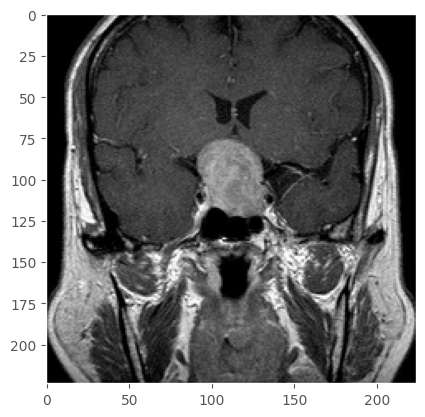

In [25]:
from tensorflow import keras
class_dict = {0: "glioma_tumor", 1: "meningioma_tumor", 2: "no_tumor", 3: "pituitary_tumor"}
model = keras.models.load_model(r"C:\Users\deevi\Downloads\Tumor\Brain2\model.h5")

test_img1 = cv2.imread(r"C:\Users\deevi\Downloads\Crop-Brain-MRI\pituitary_tumor\ 104.jpg")
test_img1 = cv2.resize(test_img1, (224, 224))
plt.imshow(test_img1)
plt.grid(False)

test_img1 = np.expand_dims(test_img1, axis=0)

pred = model.predict(test_img1)
print(pred)
pred = np.argmax(pred)
pred_class =class_dict[pred]
print(pred_class)